### Case Study: Enhancing Credit Card Processing Volume
##### Author: Bryce Smith

This case study examines a company's efforts to increase the adoption of credit card payments within its app, which is a significant revenue driver. By encouraging more customers to use credit cards, the company aims to boost its financial performance.

**Objective**:
Our goal is to increase the credit card processing volume (CC GMV) as a percentage of the total paid job volume (Total Paid GMV) on the platform. This metric, referred to as CC_USAGE, is calculated as:

CC_USAGE = CC_GMV / Total_Paid_GMV


We aim to maximize the proportion of the total paid amount that is processed via credit cards.

**Dataset Overview**:
The dataset includes information about organizations using the app for payment processing, encompassing various metrics on payment methods, organizational details, and enrollment data.

#### Data Dictionary

| **Column Name**                           | **Description**                                                                                          |
|-------------------------------------------|----------------------------------------------------------------------------------------------------------|
| **ORG_UNIQUE_ID**                         | Unique identifier for each organization using the app                                            |
| **ENROLLMENT_DATE**                       | Date when the organization enrolled with the app                                                  |
| **INDUSTRY**                              | The primary industry in which the organization operates                                                   |
| **CURRENT_COMPANY_SIZE**                  | The current size of the company (number of employees)                                                    |
| **PLAN_TIER**                             | The tier of the subscription plan the organization is enrolled in                                        |
| **PLAN_TERM**                             | The term of the subscription plan (monthly, annual)                                                      |
| **GEO_STATE**                             | The state in which the organization is located                                                           |
| **EXPECTED_LIFETIME_VALUE_AT_ENROLLMENT** | The expected lifetime value of the organization at the time of enrollment                                |
| **TOTAL_PAID_GMV**                        | The total paid job volume (in dollars) processed through the app                                         |
| **ACH_GMV**                               | The total ACH payment volume (in dollars)                                                                |
| **LOAN_GMV**                              | The total loan payment volume (in dollars)                                                               |
| **CC_GMV**                                | The total credit card payment volume (in dollars)                                                        |
| **CC_GMV_CARD_PRESENT**                   | The total credit card payment volume (in dollars) when the card was present at the time of the transaction|
| **CC_GMV_CARD_NOT_PRESENT**               | The total credit card payment volume (in dollars) when the card was not present at the time of the transaction|
| **CC_GMV_INVOICE**                        | The total credit card payment volume (in dollars) for invoices                                           |

In [319]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [320]:
df = pd.read_csv("Vendor Payment Processing.csv")

#### Sample Data

Here's a sample of the data:

In [321]:
df.head(3)

,ORG_UNIQUE_ID,ENROLLMENT_DATE,INDUSTRY,CURRENT_COMPANY_SIZE,PLAN_TIER,PLAN_TERM,GEO_STATE,EXPECTED_LIFETIME_VALUE_AT_ENROLLMENT,TOTAL_PAID_GMV,ACH_GMV,LOAN_GMV,CC_GMV,CC_GMV_CARD_PRESENT,CC_GMV_CARD_NOT_PRESENT,CC_GMV_INVOICE
0,org_e1ad439e4d374826aa205ac54fe5bae0,2015-03-30,Plumbing,20,large,monthly,CA,18731.49,209859.99,0.0,0.0,138662.72,0.0,137223.72,1439.00
1,org_7510d5bb1be04636954be20e8282b66a,2015-03-30,Carpet Cleaning,2,small,annual,ME,6303.66,23532.43,0.0,0.0,9252.57,0.0,255.00,8997.57
2,org_d8afb259ad78444cb8507e95392307bb,2015-03-30,Carpet Cleaning,1,Legacy,annual,PA,3003.16,14341.08,0.0,0.0,7342.96,0.0,2050.78,5292.18


#### Exploratory Data Analysis
When reviewing the data types assigned to the columns by the pd.read_csv() function, the columns that stand out to me are PLAN_TIER, PLAN_TERM, GEO_STATE, and ENROLLMENT_DATE. We will need to convert ENROLLMENT_DATE to the datetime data type, and determine the appropriate data types for the other three columns as either nominal categorical or ordinal categorical.

For the PLAN_TIER column, the values include large, small, legacy, medium, starter, tiny, and freeze. We should discuss with stakeholders whether there is any inherent order among these tiers. For the purposes of this case study, we will assume that there is no specific order, treating it as a nominal categorical variable. The same approach will be applied to the PLAN_TERM and GEO_STATE columns, where we will also assume that there is no specific order and treat them as nominal categorical variables.


In [322]:
df.dtypes

ORG_UNIQUE_ID                             object
ENROLLMENT_DATE                           object
INDUSTRY                                  object
CURRENT_COMPANY_SIZE                       int64
PLAN_TIER                                 object
PLAN_TERM                                 object
GEO_STATE                                 object
EXPECTED_LIFETIME_VALUE_AT_ENROLLMENT    float64
TOTAL_PAID_GMV                           float64
ACH_GMV                                  float64
LOAN_GMV                                 float64
CC_GMV                                   float64
CC_GMV_CARD_PRESENT                      float64
CC_GMV_CARD_NOT_PRESENT                  float64
CC_GMV_INVOICE                           float64
dtype: object

In [323]:
print(df['PLAN_TIER'].unique())
print(df['PLAN_TERM'].unique())
print(df['INDUSTRY'].unique())

['large' 'small' 'Legacy' 'medium' 'starter' 'tiny' 'freeze']
['monthly' 'annual' '6 months']
['Plumbing' 'Carpet Cleaning' 'Handyman' 'Home Cleaning'
 'Heating & Air Conditioning' 'Electrical' 'General Contractor']


In [324]:
df['ENROLLMENT_DATE'] = pd.to_datetime(df['ENROLLMENT_DATE'])
df['PLAN_TIER'] = pd.Categorical(df['PLAN_TIER'], ordered = False)
df['PLAN_TERM'] = pd.Categorical(df['PLAN_TERM'], ordered = False)
df['GEO_STATE'] = pd.Categorical(df['GEO_STATE'], ordered = False)
df['INDUSTRY'] = pd.Categorical(df['INDUSTRY'], ordered = False)

Credit card usage will be the variable we are looking to increase, which is not a part of the original dataset so a new column will be added CC_USAGE.

In [325]:
# df.dtypes
df['CC_USAGE'] = df['CC_GMV'] / df['TOTAL_PAID_GMV']

From the table below, we can see that our dataset consists of 1,000 organizations, with an average company size of 5 people. When examining credit card usage, the average percentage is 0.39, with a maximum of 0.57 and a minimum of -0.16. There are several interesting observations we can make from this summary table:

Negative Credit Card Usage:

- The presence of a negative credit card usage percentage is unusual and should be investigated further. A negative value suggests that an organization paid out more money to customers than it received, which may indicate data entry errors or a need for further review.

Expected Lifetime Value at Enrollment:

- The average expected lifetime value at enrollment (EXPECTED_LIFETIME_VALUE_AT_ENROLLMENT) is 641, with a maximum of 40,702. It would be beneficial to discuss with stakeholders how this forecasted value is calculated and compare it to the actual lifetime value to assess the accuracy of their predictions.

Credit Card Usage Distribution:

- 75% of the data have a credit card usage percentage below 56%. This indicates that there is significant room for improvement in credit card usage across all organizations, suggesting potential opportunities for increasing engagement or optimizing usage strategies.

In [326]:
df.describe()

,ENROLLMENT_DATE,CURRENT_COMPANY_SIZE,EXPECTED_LIFETIME_VALUE_AT_ENROLLMENT,TOTAL_PAID_GMV,ACH_GMV,LOAN_GMV,CC_GMV,CC_GMV_CARD_PRESENT,CC_GMV_CARD_NOT_PRESENT,CC_GMV_INVOICE,CC_USAGE
count,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2019-03-31 11:52:48,5.018000,8240.029390,5.689585e+04,207.517620,168.245910,18586.946610,1504.667910,9105.181300,7977.097280,0.386629
min,2015-03-30 00:00:00,0.000000,641.050000,-2.660810e+03,0.000000,0.000000,10.480000,-500.000000,-3209.210000,0.000000,-0.162360
25%,2018-05-15 18:00:00,2.000000,4328.632500,1.007467e+04,0.000000,0.000000,2199.987500,0.000000,1.000000,621.327500,0.158505
50%,2019-05-09 00:00:00,4.000000,7528.140000,3.091339e+04,0.000000,0.000000,7433.045000,0.000000,1574.665000,2993.875000,0.365536
75%,2020-05-01 18:00:00,6.000000,10285.465000,7.041065e+04,0.000000,0.000000,21786.162500,0.000000,8477.165000,9095.445000,0.566367
max,2021-03-30 00:00:00,87.000000,40702.300000,1.213880e+06,38735.500000,24200.000000,443241.510000,143435.280000,190105.800000,315494.010000,1.000000
std,NaN,6.298519,5488.949749,8.448971e+04,1700.768149,1398.128485,32076.959062,6870.464585,20234.680153,16578.345363,0.270918


We do not see any nulls in the dataset.

In [327]:
null_values = df.isnull().sum()
print(null_values)

ORG_UNIQUE_ID                            0
ENROLLMENT_DATE                          0
INDUSTRY                                 0
CURRENT_COMPANY_SIZE                     0
PLAN_TIER                                0
PLAN_TERM                                0
GEO_STATE                                0
EXPECTED_LIFETIME_VALUE_AT_ENROLLMENT    0
TOTAL_PAID_GMV                           0
ACH_GMV                                  0
LOAN_GMV                                 0
CC_GMV                                   0
CC_GMV_CARD_PRESENT                      0
CC_GMV_CARD_NOT_PRESENT                  0
CC_GMV_INVOICE                           0
CC_USAGE                                 0
dtype: int64


The organization in row 983 has a negative credit card usage. This is caused by a value of -\$2,661 for total amount the organization has been paid through the app. This would mean the organization has paid the customers more money than they've received. This would be addressed with the stakeholders but for the sake of this case study, we're going to assume this is a data entry mistake and remove the row altogether.

In [328]:
negative_cc_usage = df[df['CC_USAGE'] < 0]

# Display the rows
negative_cc_usage

,ORG_UNIQUE_ID,ENROLLMENT_DATE,INDUSTRY,CURRENT_COMPANY_SIZE,PLAN_TIER,PLAN_TERM,GEO_STATE,EXPECTED_LIFETIME_VALUE_AT_ENROLLMENT,TOTAL_PAID_GMV,ACH_GMV,LOAN_GMV,CC_GMV,CC_GMV_CARD_PRESENT,CC_GMV_CARD_NOT_PRESENT,CC_GMV_INVOICE,CC_USAGE
983,74b34c0d-045a-46f9-ab75-9c4de00918fc,2021-03-16,Heating & Air Conditioning,1,small,annual,NC,7523.0,-2660.81,0.0,0.0,432.01,432.01,0.0,0.0,-0.16236


In [329]:
df = df[df['CC_USAGE'] >= 0]

Let’s examine the credit card usage variable. From the distribution of the CC Usage chart, we can see that the distribution is slightly left-skewed. This is evident from the median being to the left of the average. A left-skewed distribution indicates that our dataset contains a larger number of rows with low CC usage values, while there are fewer rows with higher CC usage values.

In [330]:
#EDA
print('10% of the data are below: ' + str(round(df['CC_USAGE'].quantile(.1),2)))
print('25% of the data are below: ' + str(round(df['CC_USAGE'].quantile(.25),2)))
print('50% of the data are below: ' + str(round(df['CC_USAGE'].quantile(.5),2)))
print('75% of the data are below: ' + str(round(df['CC_USAGE'].quantile(.75),2)))
print('90% of the data are below: ' + str(round(df['CC_USAGE'].quantile(.90),2)))

10% of the data are below: 0.05
25% of the data are below: 0.16
50% of the data are below: 0.37
75% of the data are below: 0.57
90% of the data are below: 0.78


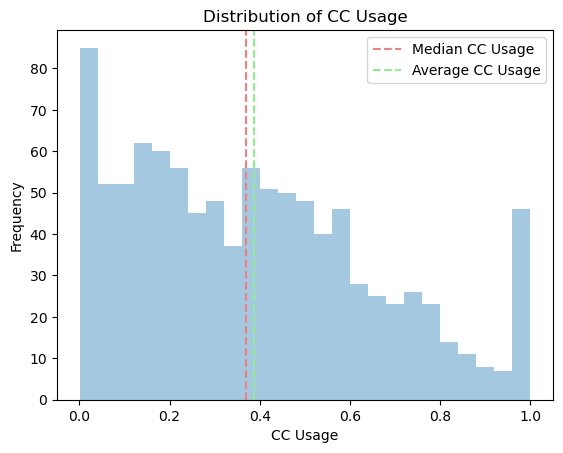

In [331]:
sns.distplot(df.CC_USAGE, bins = 25, kde = False)
plt.axvline(round(df['CC_USAGE'].quantile(.5),2), color='lightcoral', linestyle='--', label = 'Median CC Usage')
plt.axvline(df.CC_USAGE.mean(), color='lightgreen', linestyle='--', label = 'Average CC Usage')
plt.title('Distribution of CC Usage')
plt.xlabel('CC Usage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Plotting our categorical data with CC usage we see some interesting trends. Home cleaning has the highest average CC usage out of the industries. Legacy has the highest average CC usage but only 4 organizations are on the Legacy plan tier. Rows with 6 month plan term has the highest average CC usage. 

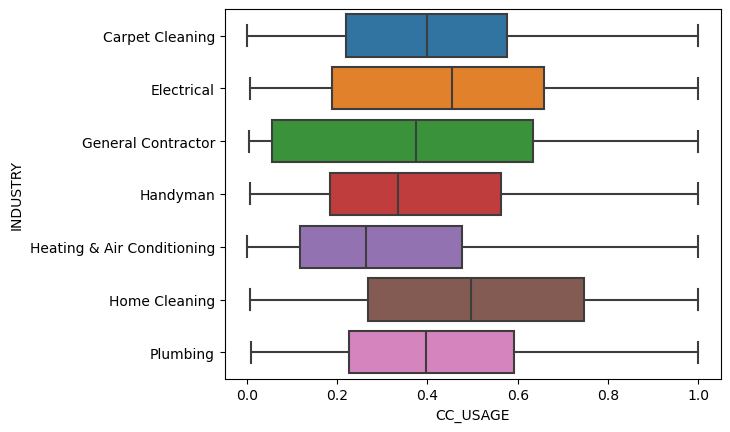

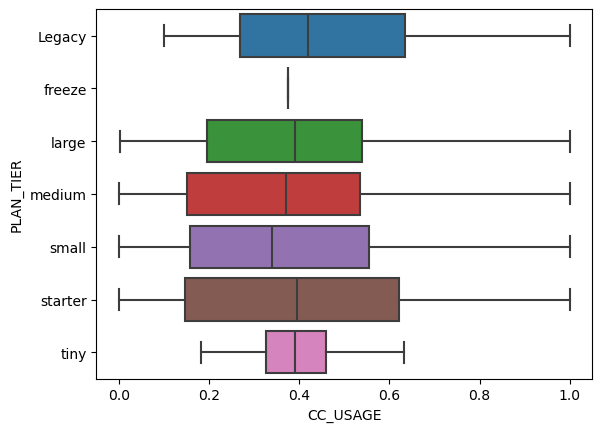

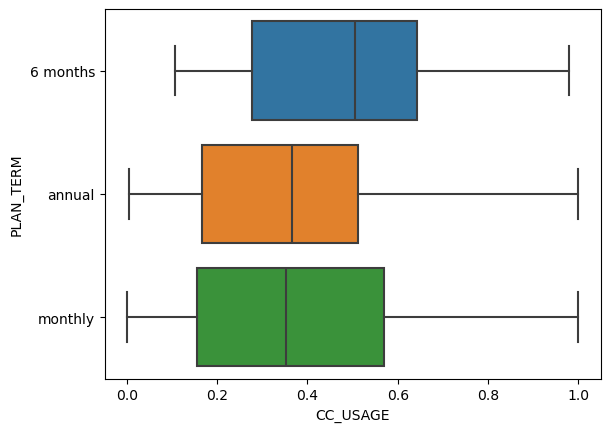

In [332]:
#Boxplots
#CC_Usage
sns.boxplot(x='CC_USAGE', y = 'INDUSTRY', data=df, orient = 'h')
plt.show()

sns.boxplot(x='CC_USAGE', y = 'PLAN_TIER', data=df, orient = 'h')
plt.show()

sns.boxplot(x='CC_USAGE', y = 'PLAN_TERM', data=df, orient = 'h')
plt.show()

Looking at the data tables below, two key observations can be made:

Industry-Specific Campaign:

- The industry with the lowest average credit card (CC) usage is Heating & Air Conditioning, which comprises approximately 40% of the organizations in the dataset. This suggests that Heating & Air Conditioning is a promising candidate for an industry-specific campaign aimed at increasing CC usage.

Plan Term Analysis:

- Approximately 80% of the dataset falls under the monthly plan term. Additionally, the 6-month plan term has the highest average CC usage among the different plan terms. It would be worth investigating whether there are unique features of the 6-month plan that contribute to higher credit card payments. If so, a campaign designed to convert organizations from the monthly plan term to the 6-month plan term might help increase overall CC usage.

In [333]:
#Data tables
avg_usage_by_industry = df.groupby('INDUSTRY')['CC_USAGE'].mean().sort_values(ascending=False)
count_by_industry = df.groupby('INDUSTRY')['ORG_UNIQUE_ID'].count().sort_values(ascending=False)

Industry_df_avg = pd.DataFrame(avg_usage_by_industry)
Industry_df_count = pd.DataFrame(count_by_industry)
Industry_df = pd.merge(Industry_df_avg, Industry_df_count, left_index = True, right_index = True)
Industry_df

,CC_USAGE,ORG_UNIQUE_ID
INDUSTRY,,
Home Cleaning,0.512610,76
Electrical,0.453145,84
Carpet Cleaning,0.421126,153
Plumbing,0.409024,203
Handyman,0.402749,41
General Contractor,0.391133,25
Heating & Air Conditioning,0.326172,417


In [334]:
#Data tables
avg_usage_by_term = df.groupby('PLAN_TERM')['CC_USAGE'].mean().sort_values(ascending=False)
count_by_term = df.groupby('PLAN_TERM')['ORG_UNIQUE_ID'].count().sort_values(ascending=False)

term_df_avg = pd.DataFrame(avg_usage_by_term)
term_df_count = pd.DataFrame(count_by_term)
term_df = pd.merge(term_df_avg, term_df_count, left_index = True, right_index = True)
term_df

,CC_USAGE,ORG_UNIQUE_ID
PLAN_TERM,,
6 months,0.488033,27
monthly,0.388964,815
annual,0.360565,157


In [335]:
#Data tables
avg_usage_by_tier = df.groupby('PLAN_TIER')['CC_USAGE'].mean().sort_values(ascending=False)
count_by_tier = df.groupby('PLAN_TIER')['ORG_UNIQUE_ID'].count().sort_values(ascending=False)

tier_df_avg = pd.DataFrame(avg_usage_by_tier)
tier_df_count = pd.DataFrame(count_by_tier)
tier_df = pd.merge(tier_df_avg, tier_df_count, left_index = True, right_index = True)
tier_df

,CC_USAGE,ORG_UNIQUE_ID
PLAN_TIER,,
Legacy,0.484551,4
starter,0.416157,146
tiny,0.398687,5
large,0.391116,128
small,0.382841,596
freeze,0.375000,1
medium,0.365462,119


It would be a good idea to work closely with the organization in row 525 to understand why it is that they are getting high CC usage.

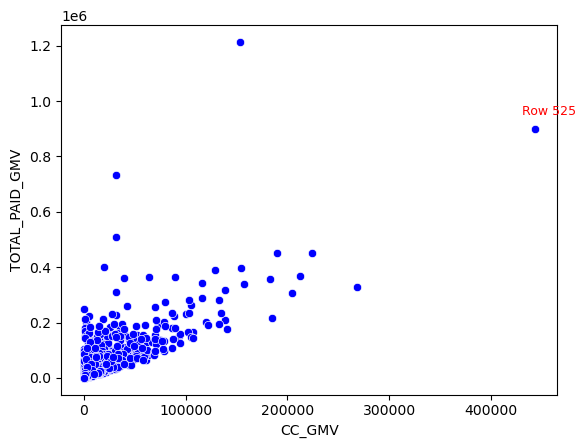

In [336]:
df_corr = df[['TOTAL_PAID_GMV', 'CC_GMV']]
correlation_matrix = df_corr.corr()
correlation_matrix

scatter = sns.scatterplot(data = df_corr, x='CC_GMV', y='TOTAL_PAID_GMV', color='blue')
index_to_label = 525
x = df_corr['CC_GMV'].iloc[index_to_label]
y = df_corr['TOTAL_PAID_GMV'].iloc[index_to_label]

# Annotate the point on the scatter plot
scatter.annotate(
    'Row 525',  
    (x, y),  
    textcoords="offset points",  
    xytext=(10,10), 
    ha='center',  
    fontsize=9, 
    color='red' 
)

plt.show()

In [337]:
df[(df['TOTAL_PAID_GMV'] > 800000) & (df['CC_GMV'] > 400000)]

,ORG_UNIQUE_ID,ENROLLMENT_DATE,INDUSTRY,CURRENT_COMPANY_SIZE,PLAN_TIER,PLAN_TERM,GEO_STATE,EXPECTED_LIFETIME_VALUE_AT_ENROLLMENT,TOTAL_PAID_GMV,ACH_GMV,LOAN_GMV,CC_GMV,CC_GMV_CARD_PRESENT,CC_GMV_CARD_NOT_PRESENT,CC_GMV_INVOICE,CC_USAGE
525,a03de35c-66d5-4fdc-812c-14a3a1bc858b,2019-06-12,Heating & Air Conditioning,54,medium,monthly,ME,13430.71,898610.17,0.0,0.0,443241.51,27072.0,100675.5,315494.01,0.493252


#### Campaign Suggestion
The main goal of this case study is to identify organizations that should receive targeted marketing efforts to encourage an increase in credit card (CC) usage. To address this goal, I focused on organizations with low CC usage and high total paid volume on the app. Specifically, I identified organizations that fall into the lower quartile for CC usage and the higher quartile for paid volume. This analysis led to the identification of 80 organizations, highlighted in red in the scatter plot below.

One notable example is the organization in Row 24, which has a total paid volume of $1,213,880 but only a 13% CC usage rate. This organization could be a valuable partner for exploring reasons behind low CC usage and developing strategies to increase it. Insights gained from understanding Row 24’s situation could be used to implement a targeted strategy across the remaining 79 organizations with low CC usage and high paid volume.

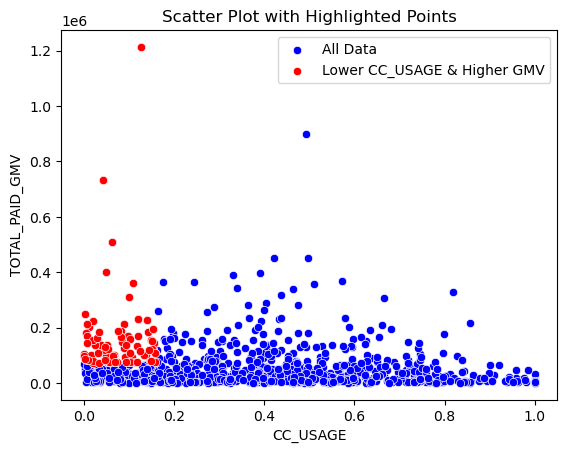

In [338]:
q1_cc_usage = df['CC_USAGE'].quantile(.25)
q3_paid_gmv = df['TOTAL_PAID_GMV'].quantile(.75)
filtered_df = df[(df['CC_USAGE'] <= q1_cc_usage) & (df['TOTAL_PAID_GMV'] >= q3_paid_gmv)]
sns.scatterplot(data = df, x = 'CC_USAGE', y = 'TOTAL_PAID_GMV', color = 'blue', label = 'All Data')
sns.scatterplot(data = filtered_df, x='CC_USAGE', y='TOTAL_PAID_GMV', color='red', label='Lower CC_USAGE & Higher GMV', marker='o')
plt.xlabel('CC_USAGE')
plt.ylabel('TOTAL_PAID_GMV')
plt.title('Scatter Plot with Highlighted Points')
plt.legend()

plt.show()

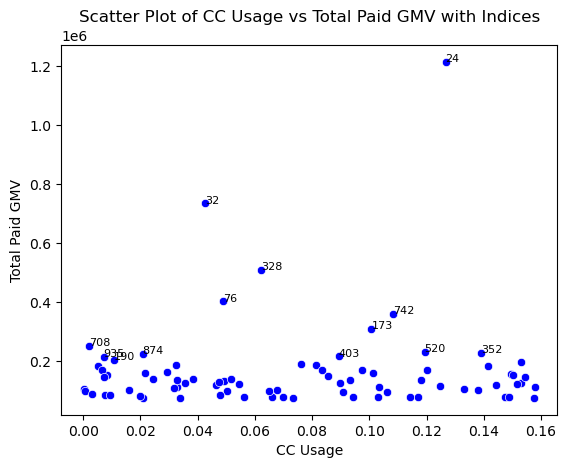

In [339]:
scatter = sns.scatterplot(data = filtered_df, x='CC_USAGE', y='TOTAL_PAID_GMV', color='blue')
greater_than_2000 = filtered_df[filtered_df['TOTAL_PAID_GMV'] >= 200000]

for i in greater_than_2000.index:
    scatter.text(x=filtered_df['CC_USAGE'][i], y=filtered_df['TOTAL_PAID_GMV'][i], s=str(i),
                      fontdict=dict(color='black', size=8),
                      bbox=dict(facecolor='white', alpha= 0, edgecolor='none'))
# Show plot
plt.xlabel('CC Usage')
plt.ylabel('Total Paid GMV')
plt.title('Scatter Plot of CC Usage vs Total Paid GMV with Indices')
plt.show()

In [340]:
row_24 = df.loc[24]
print(row_24)

ORG_UNIQUE_ID                            org_de455b04c498447e949909f56105e0ad
ENROLLMENT_DATE                                           2016-04-05 00:00:00
INDUSTRY                                           Heating & Air Conditioning
CURRENT_COMPANY_SIZE                                                       69
PLAN_TIER                                                               large
PLAN_TERM                                                              annual
GEO_STATE                                                                  CA
EXPECTED_LIFETIME_VALUE_AT_ENROLLMENT                                18023.79
TOTAL_PAID_GMV                                                     1213880.08
ACH_GMV                                                                   0.0
LOAN_GMV                                                                  0.0
CC_GMV                                                              153730.51
CC_GMV_CARD_PRESENT                                             

Lastly, if the stakeholders want to target a geographic region, I would suggest California, Texas and Florida. These states have the most total paid GMV with room to increase CC usage. Specifically, California has 10 organizations in the low CC usage and high total paid gmv category.

In [353]:
state_summary = df.groupby('GEO_STATE').agg({
    'CC_USAGE': 'mean',
    'TOTAL_PAID_GMV': 'sum',
    'ORG_UNIQUE_ID': 'count'
}).reset_index()

# Sort by TOTAL_PAID_GMV in descending order to identify top states
state_summary = state_summary.sort_values(by='TOTAL_PAID_GMV', ascending=False)

print(state_summary)

   GEO_STATE  CC_USAGE  TOTAL_PAID_GMV  ORG_UNIQUE_ID
10        FL  0.387347      8415773.49            132
5         CA  0.354361      8411830.47            127
49        TX  0.428928      6896886.40            130
3         AZ  0.497432      2485348.62             43
42        PA  0.330874      1702987.52             23
51        VA  0.393066      1680310.74             26
33        NJ  0.384238      1549766.68             21
6         CO  0.481542      1514012.81             36
29        NC  0.383723      1500095.22             29
37        NY  0.367498      1372162.14             17
45        SC  0.292811      1367624.02             20
11        GA  0.444852      1170042.44             22
20        MA  0.367641      1167549.48             16
40        ON  0.319386      1165053.61             14
22        MD  0.416930      1153809.33             21
23        ME  0.415864      1035115.74              5
26        MO  0.298114      1034772.68             21
53        WA  0.444604      

##### Below are supporting data tables for the 80 organizations with low CC usage but high paid GMV.

In [341]:
#Data tables
avg_usage_by_industry = filtered_df.groupby('INDUSTRY')['CC_USAGE'].mean().sort_values(ascending=False)
avg_GMV_by_industry = filtered_df.groupby('INDUSTRY')['TOTAL_PAID_GMV'].mean().sort_values(ascending=False)
count_by_industry = filtered_df.groupby('INDUSTRY')['ORG_UNIQUE_ID'].count().sort_values(ascending=False)

Industry_df_avg = pd.DataFrame(avg_usage_by_industry)
Industry_df_count = pd.DataFrame(count_by_industry)
Industry_df_GMV = pd.DataFrame(avg_GMV_by_industry)
Industry_df = pd.merge(Industry_df_avg, Industry_df_count, left_index = True, right_index = True)
Industry_df = pd.merge(Industry_df, avg_GMV_by_industry, left_index = True, right_index = True)
Industry_df

,CC_USAGE,ORG_UNIQUE_ID,TOTAL_PAID_GMV
INDUSTRY,,,
Handyman,0.103181,2,88680.330000
Electrical,0.101663,5,173742.390000
Plumbing,0.093111,10,118339.230000
Heating & Air Conditioning,0.074178,52,179937.685962
Home Cleaning,0.071275,2,134022.690000
Carpet Cleaning,0.035817,7,124468.340000
General Contractor,0.012939,2,202252.585000


In [342]:
#Data tables
avg_usage_by_term = filtered_df.groupby('PLAN_TERM')['CC_USAGE'].mean().sort_values(ascending=False)
count_by_term = filtered_df.groupby('PLAN_TERM')['ORG_UNIQUE_ID'].count().sort_values(ascending=False)
avg_GMV_by_term = filtered_df.groupby('PLAN_TERM')['TOTAL_PAID_GMV'].mean().sort_values(ascending=False)

term_df_avg = pd.DataFrame(avg_usage_by_term)
term_df_count = pd.DataFrame(count_by_term)
term_df_GMV = pd.DataFrame(avg_GMV_by_term)
term_df = pd.merge(term_df_avg, term_df_count, left_index = True, right_index = True)
term_df = pd.merge(term_df, avg_GMV_by_term, left_index = True, right_index = True)
term_df

,CC_USAGE,ORG_UNIQUE_ID,TOTAL_PAID_GMV
PLAN_TERM,,,
6 months,0.106212,1,92311.000000
annual,0.103641,16,275692.580000
monthly,0.065996,63,136931.130635


In [343]:
#Data tables
avg_usage_by_tier = filtered_df.groupby('PLAN_TIER')['CC_USAGE'].mean().sort_values(ascending=False)
count_by_tier = filtered_df.groupby('PLAN_TIER')['ORG_UNIQUE_ID'].count().sort_values(ascending=False)
avg_GMV_by_tier = filtered_df.groupby('PLAN_TIER')['TOTAL_PAID_GMV'].mean().sort_values(ascending=False)

tier_df_avg = pd.DataFrame(avg_usage_by_tier)
tier_df_GMV = pd.DataFrame(avg_GMV_by_tier)
tier_df_count = pd.DataFrame(count_by_tier)
tier_df = pd.merge(tier_df_avg, tier_df_count, left_index = True, right_index = True)
tier_df = pd.merge(tier_df, avg_GMV_by_tier, left_index = True, right_index = True)
tier_df

,CC_USAGE,ORG_UNIQUE_ID,TOTAL_PAID_GMV
PLAN_TIER,,,
large,0.088088,21,198492.184286
medium,0.072011,24,184917.270000
small,0.067493,34,129169.917941
starter,0.049315,1,131925.950000
Legacy,NaN,0,NaN
freeze,NaN,0,NaN
tiny,NaN,0,NaN


In [354]:
#State Summary
state_summary = filtered_df.groupby('GEO_STATE').agg({
    'CC_USAGE': 'mean',
    'TOTAL_PAID_GMV': 'sum',
    'ORG_UNIQUE_ID': 'count'
}).reset_index()

# Sort by TOTAL_PAID_GMV in descending order to identify top states
state_summary = state_summary.sort_values(by='TOTAL_PAID_GMV', ascending=False)

print(state_summary)

   GEO_STATE  CC_USAGE  TOTAL_PAID_GMV  ORG_UNIQUE_ID
5         CA  0.101103      2426281.97             10
10        FL  0.074153      1460017.90              8
45        SC  0.107388       738945.58              4
33        NJ  0.085040       711238.78              3
22        MD  0.088821       664985.12              3
20        MA  0.057053       498181.24              2
3         AZ  0.035086       481460.41              3
29        NC  0.039257       437615.58              3
42        PA  0.097362       421262.14              3
6         CO  0.080455       391637.26              3
49        TX  0.087579       357407.48              3
14        ID  0.029150       305763.20              2
26        MO  0.053478       297169.76              3
39        OK  0.086019       281336.71              2
37        NY  0.015806       276191.79              2
15        IL  0.001992       250591.60              1
1         AL  0.046017       236766.41              2
9         DE  0.119346      